In [156]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [157]:
mx.__version__,gcv.__version__

('1.5.1', '0.5.0')

In [158]:
# Import the image

image = mx.image.imread('Images/fuji3.jpeg')


In [159]:
image.shape

(415, 739, 3)

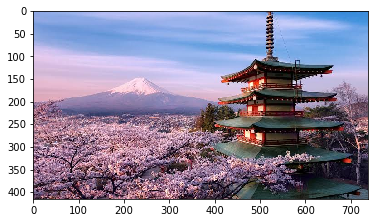

In [160]:
plt.imshow(image.asnumpy())

In [161]:
# Transform and Batch image

image_t = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [162]:
image_t.shape

(1, 3, 224, 224)

<b>It is of the format (batch,channels,width,height)

In [163]:
# Load the model

network = gcv.model_zoo.resnet101_v1d(pretrained=True)

In [164]:
#Prediction

prediction = network(image_t)

In [165]:
prediction.shape

(1, 1000)

In [166]:
prediction = prediction[0]

In [167]:
# Calculate probability

probability = mx.nd.softmax(prediction)
rounded_probability = mx.nd.round(probability*100)/100

In [168]:
# Get Top-k

k = 10
topk_indices = mx.nd.topk(probability,k=k)

In [169]:
topk_indices


[442. 483. 980. 698. 975. 449. 119. 762. 476. 494.]
<NDArray 10 @cpu(0)>

#1 bell cote (26.4%)
#2 castle (21.9%)
#3 volcano (6.06%)
#4 palace (3.57%)
#5 lakeside (1.33%)
#6 boathouse (0.899%)
#7 rock crab (0.27%)
#8 restaurant (0.266%)
#9 carousel (0.25%)
#10 chime (0.245%)


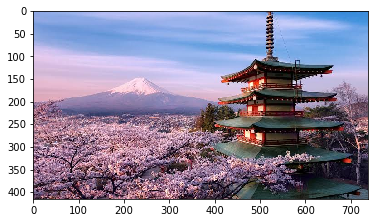

In [170]:
# Get class Labels
plt.imshow(image.asnumpy())

for i in range(k):
    class_index = topk_indices[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    
    print('#{} {} ({:0.3}%)'.format(i+1,class_label,class_probability.asscalar()*100))
